# Generating Training Data

In [1]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import math
import random
from scipy import stats

In [2]:
functions = [lambda x : x, 
             lambda x : 101 - x,
             lambda x : 50.5 + 49.5 * math.sin(math.pi / 2 + x / (5 * math.pi)),
             lambda x : random.randint(1, 101)]

In [3]:
points = []
xs = []
ys = []
for i in range(50):
    x = random.randint(1,101)
    y = functions[2](x)
#     print(x, y)
    points.append((x,y))
    xs.append(x)
    ys.append(y)

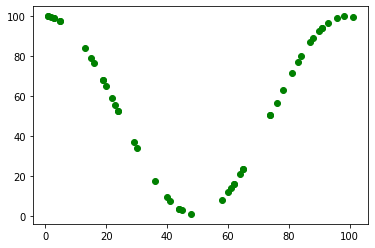

In [4]:
plt.figure()
plt.scatter(xs, ys, color="green")

In [5]:
def plot_function(func_num, plot=True):
    """
    Plot 50 (x,y) pairs for given function
    """
    points = []
    xs = []
    ys = []
    colors = ['maroon', 'blue', 'green', 'orange']
    for i in range(50):
        x = random.randint(1,101)
        while x in xs:
            x = random.randint(1,101)            
        y = functions[func_num](x)
    #     print(x, y)
        points.append((x,y))
        xs.append(x)
        ys.append(y)
    if plot:
        plt.figure()
        plt.scatter(xs, ys, color=colors[func_num])
    return (xs, ys)

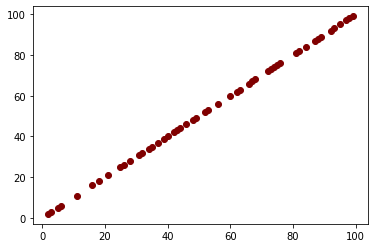

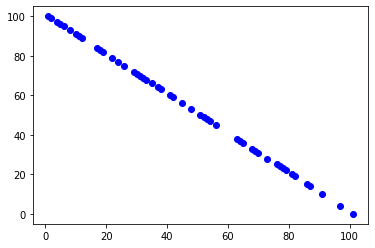

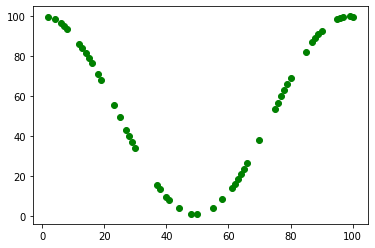

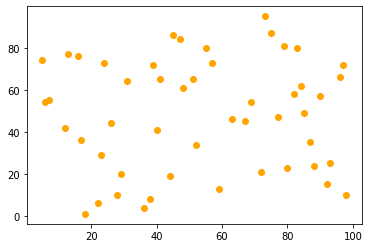

In [6]:
for i in range(4):
    plot_function(i)

In [7]:
def graph_normal(mu, sigma):
    # uncomment this code to graph the normal distribution 

    count, bins, ignored = plt.hist(a, 30, density=True)
    plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
             np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
             linewidth=2, color='r')
    plt.show()

In [8]:
# mu, sigma = 0, 1 # mean and standard deviation
a = np.random.normal(1, 1, 1000)
b = np.random.normal(0, 1, 1000)

# Model for Intergenerational Transfer based on linear prior hypotheses

The prior hypotheses comprise of two variables a, which refers to the slope of the hypothesis, and b which refers to the y-intercept of the hypothesis. a will be chosen from a normal distribution centered around 1, while b will be chosen from a normal distribution centered around 0.

In [9]:
def get_prob_data_given_func(points_known, a, b):
    prod = 0
    for x, y in points_known:
        y_pred = a*x+b
        stat = stats.norm.pdf(y_pred, y, 10)
        prod = prod + np.log(stat)
    return prod

def get_probs_for_discrete_funcs_given_data(points_known):
    probs = np.zeros((500,200))
    for a in np.arange(-2.0, 3.0, 0.01):
        for b in np.arange(-1.0, 1.0, 0.01):
            prob_a = stats.norm.pdf(a, 1, 10)
            prob_b = stats.norm.pdf(b, 0, 20)
            probs[int(100*a+200)][int(100*b+100)] = np.exp(get_prob_data_given_func(points_known, a, b)+np.log(prob_a)+np.log(prob_b))
    return probs

conditioning the data to generate posterior probabilities


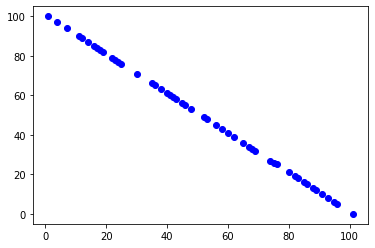

In [10]:
# Step 1 and 2: generate graph for first function
xs, ys = plot_function(1, plot=True)

# Step 3: take first 25 without replacement
bag_x = []
bag_y = []

new_x = []
new_y = []
points_known = []

for i in range(25):
    ind = random.randint(0, len(xs)-1)
    x = xs.pop(ind)
    y = ys.pop(ind)
    points_known.append((x,y))
    
print('conditioning the data to generate posterior probabilities')
    
probs = get_probs_for_discrete_funcs_given_data(points_known)

In [12]:
probs_2 = np.copy(probs)

In [13]:
#if attempting to randomly sample an a and b based on magnitude of its posterior probability
probs_2 /= probs_2.sum()
# print(a)
def sample(a, n=1):
    a = np.asarray(a)
    choices = np.prod(a.shape)
    index = np.random.choice(choices, size=n, p=a.ravel())
    return np.unravel_index(index, dims=a.shape)

In [11]:
#Initial Method to sample a and b
ans = np.unravel_index(probs.argmax(), probs.shape)
a = (ans[0]-200)/100
b = (ans[1]-100)/100
print(a)
print(b)


0.43
0.99


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  


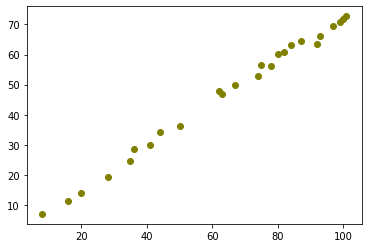

In [14]:
# do test step
for i in range(25):
    ind = random.randint(0, len(xs)-1)
    x = xs.pop(ind)
    y = ys.pop(ind)
    
    bag_x.append(x)
    bag_y.append(y)
    
    ans = sample(probs_2)
    a, b = ans[0][0], ans[1][0]
    a = (a - 200) / 100
    b = (b - 100) / 100
    sigma = 0.001
    mu = a * x + b

    y = np.random.normal(mu, sigma, 1000)
    y = y[random.randint(0,len(y)-1)]
    
#     # alternative method to sample from normal
#     y = mu + np.random.normal() * sigma
    
    new_x.append(x)
    new_y.append(y)

# graph after one generation

plt.figure()
plt.scatter(new_x, new_y, color="#808000")

In [17]:
plt.savefig("Model_Generation_0_Negative.png")

<Figure size 432x288 with 0 Axes>

Running model for generation 0


KeyboardInterrupt: 

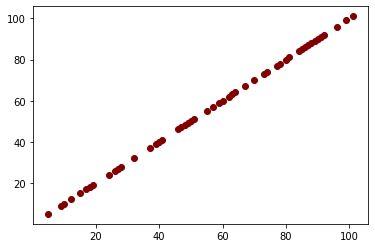

In [18]:
#### for multiple generations


# Step 1 and 2: generate graph for first function
xs, ys = plot_function(0, plot=True)
orig_x, orig_y = xs[:], ys[:]

# Step 3: take first 25 without replacement
bag_x = []
bag_y = []

for gen_num in range(10):
    print("Running model for generation %d" %gen_num)
    new_x = []
    new_y = []

    #conditioning on points known
    points_known = []
    for i in range(25):
        ind = random.randint(0, len(xs)-1)
        x = xs.pop(ind)
        y = ys.pop(ind)
        points_known.append((x,y))
    probs = get_probs_for_discrete_funcs_given_data(points_known)
    probs_2 = np.copy(probs)
    probs_2 /= probs_2.sum()
        
    # predicting y values for test set
    for i in range(25):
        ind = random.randint(0, 25-i)
        x = orig_x.pop(ind)
        y = orig_y.pop(ind)
        orig_x.append(x)
        orig_y.append(y)

        bag_x.append(x)
        bag_y.append(y)

        ans = sample(probs_2)
        a, b = ans[0][0], ans[1][0]
        a = (a - 200) / 100
        b = (b - 100) / 100
        #have subject condition on points_known
        mu = a * x + b

        sigma = 0.001

        y = np.random.normal(mu, sigma, 1000)
        y = y[random.randint(0,len(y)-1)]

        new_x.append(x)
        new_y.append(y)

    # graph after one generation

    plt.figure()
    plt.scatter(new_x, new_y, color="#808000")
    plt.savefig("Model_0_Generation_%d_Positive.png" %gen_num)
    print("saved image for %d" %gen_num)
    
    xs = new_x
    ys = new_y